# Linear Regression

## Simple Linear Regression

"Finds a line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion."


The model is represented by the equation:
$y = \beta_0 + \beta_1 x_1 + \epsilon$

Where:
* $y$ is the dependent variable.
* $x_1$ is the independent variable.
* $\beta_0$ is the y-intercept (the value of $y$ when $x_1$ is 0).
* $\beta_1$ is the slope of the line (the change in $y$ for a one-unit change in $x_1$).
* $\epsilon$ is the error term (the part of $y$ that cannot be explained by the linear relationship).

The goal is to find the values of $\beta_0$ and $\beta_1$ that minimize the Mean Squared Error (MSE):
$$\text{Minimize} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$
where $N$ is the number of samples, $y_i$ is the actual value, and $\hat{y}_i = \beta_0 + \beta_1 x_{i1}$ is the predicted value for the $i$-th sample.

## Multi Variable Regression


The model is represented by the equation:
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon$

Where:
* $y$ is the dependent variable.
* $x_1, x_2, \dots, x_n$ are the $n$ independent variables.
* $\beta_0$ is the y-intercept.
* $\beta_1, \beta_2, \dots, \beta_n$ are the coefficients for each independent variable, representing the change in $y$ for a one-unit change in the corresponding $x$ variable, holding other variables constant.
* $\epsilon$ is the error term.

The goal is to find the values of $\beta_0, \beta_1, \dots, \beta_n$ that minimize the Mean Squared Error (MSE):
$$\text{Minimize} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$
where $\hat{y}_i = \beta_0 + \sum_{j=1}^{n} \beta_j x_{ij}$ is the predicted value for the $i$-th sample with $n$ features.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import sklearn.model_selection

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [ ]:

oecd_bli_url = "https://github.com/vuhung16au/ACU/raw/refs/heads/main/ITEC203/Week08/oecd_bli_2015.csv"
# Load the data from the URLs
oecd_bli = pd.read_csv(oecd_bli_url)
oecd_bli.head(5)

# Load the data from local files
# oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
# gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [ ]:
gdp_per_capita_url = "https://github.com/vuhung16au/ACU/raw/refs/heads/main/ITEC203/Week08/gdp_per_capita.csv"

gdp_per_capita = pd.read_csv(gdp_per_capita_url, encoding='latin-1', delimiter='\t')
gdp_per_capita.head(5)


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.383",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.135",2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.315",2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.302",2011.0


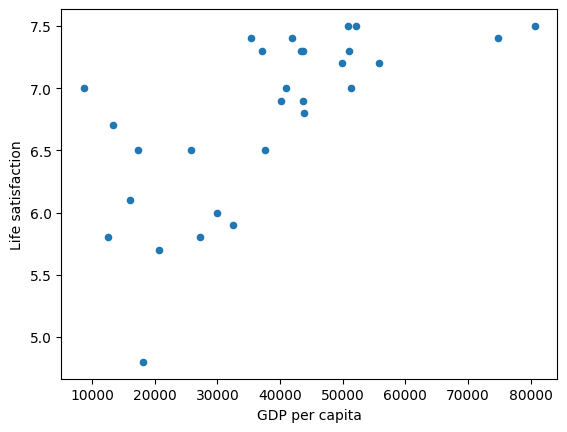

Prediction for Cyprus: [[6.36326558]]


In [ ]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

# Convert 'GDP per capita' column to numeric, removing commas
country_stats["GDP per capita"] = pd.to_numeric(country_stats["GDP per capita"].str.replace(',', ''))

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print('Prediction for Cyprus:', model.predict(X_new))

In [ ]:
# Check linear model's parameters
print("model.coef_: ", model.coef_)
print("model.intercept_: ",model.intercept_)

model.coef_:  [[2.64542565e-05]]
model.intercept_:  [5.76574329]


In [ ]:
prediction_value = model.coef_*X_new + model.intercept_
print(prediction_value)

[[6.36326558]]


In [ ]:
# float(model.coef_)

# Use this to extract the first element:
float(model.coef_[0][0])


2.645425646284423e-05

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def abline(slope, intercept, axes):
    """Plot a line from slope and intercept"""
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

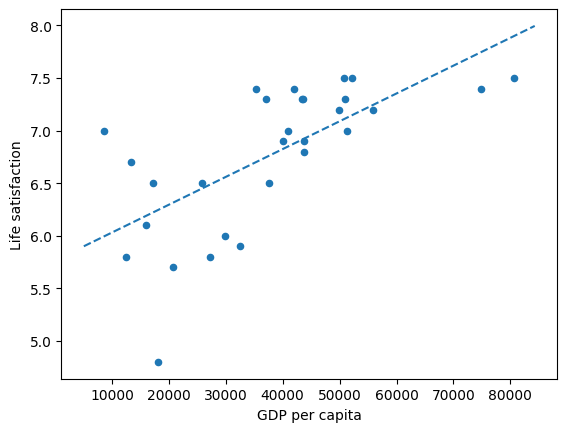

In [ ]:
# # What's the liner model looks like?
# axes = country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# abline(float(model.coef_[0][0]), float(model.intercept_), axes)

# What's the linear model looks like?
axes = country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Fix: Extract single elements from both arrays before converting to float
abline(float(model.coef_[0][0]), float(model.intercept_[0]), axes)

# Polynomial Regression


The model equation for a single independent variable with a polynomial of degree $q$ is:
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \dots + \beta_q x_1^q + \epsilon$

Where:
* $y$ is the dependent variable.
* $x_1$ is the independent variable.
* $x_1^2, \dots, x_1^q$ are the polynomial terms created from $x_1$.
* $\beta_0, \beta_1, \dots, \beta_q$ are the coefficients for each term.
* $\epsilon$ is the error term.

The goal is to find the coefficients that minimize the Mean Squared Error (MSE) on the transformed features. This can be extended to multiple independent variables by including interaction terms (e.g., $x_1 x_2$) as well.

Quiz: Can we think Polynomial Regression as a form of Linear Regression?

## Example of Polynomial Regression

In [3]:
import numpy as np
import numpy.random as rnd
from sklearn.linear_model import LinearRegression

np.random.seed(42)

In [4]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

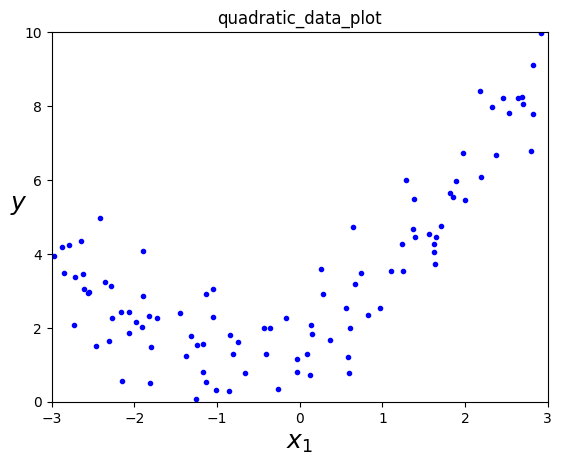

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("quadratic_data_plot")
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]


array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[1.78134581]
[[0.93366893 0.56456263]]


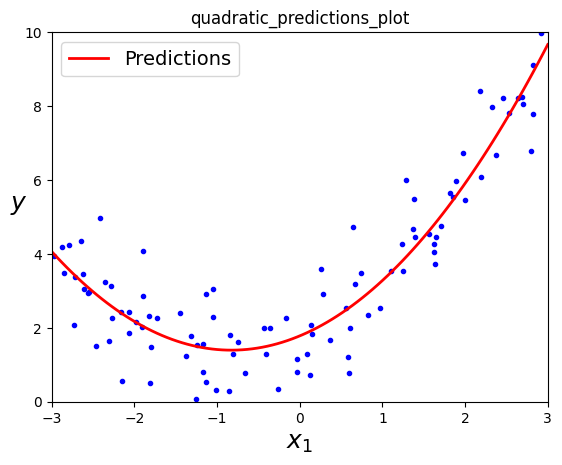

In [8]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title("quadratic_predictions_plot")
plt.show()

## If we force to fit the data with linear regression

In [9]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X, y)
print(lin_reg2.intercept_)
print(lin_reg2.coef_)

[3.56401543]
[[0.84362064]]


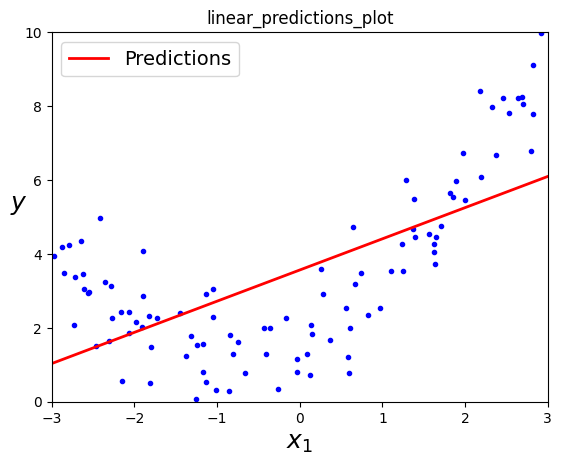

In [10]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
y_new = lin_reg2.predict(X_new)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title("linear_predictions_plot")
plt.show()

# Overfitting and Regularization

## Overfitting

Model performs well on training data but not generalise well

## Underfitting

Model is too simple to learn the structure of the data.

## Regularisation

Reduce the risk of overfitting by adding penalites to the models.



## Overfitting, Underfitting Example

We generate a sample dataset based on $y = x^2$, add some noise and do linear regression, polynomial regression (underfitted) of degree 2 and 10 (overfitted)

Degree 1: Training R2 = 0.46, Testing R2 = 0.34
Degree 2: Training R2 = 0.53, Testing R2 = 0.56
Degree 10: Training R2 = 0.57, Testing R2 = 0.42


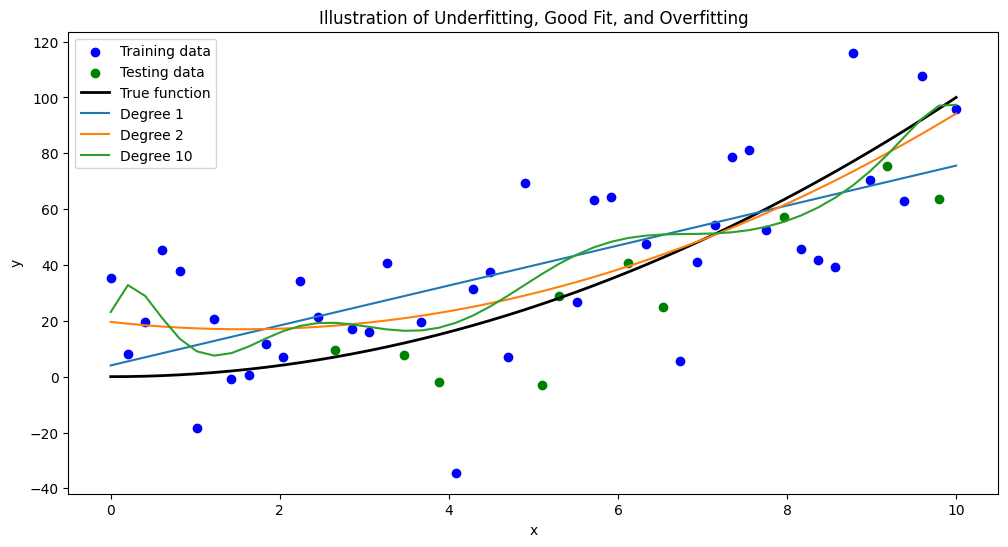

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data
np.random.seed(0)  # For reproducibility
x = np.linspace(0, 10, 50)  # Generate 50 data points from 0 to 10
y_true = x**2  # True function: quadratic
y = y_true + 20 * np.random.normal(size=x.shape)  # Add Gaussian noise with std=20

# Step 2: Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 3: Plot true function and data
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, label='Training data', color='blue')
plt.scatter(x_test, y_test, label='Testing data', color='green')
plt.plot(x, y_true, label='True function', color='black', linewidth=2)
plt.legend()

# Step 4: Define degrees for models (underfitting, good fit, overfitting)
degrees = [1, 2, 10]

for deg in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    x_train_poly = poly.fit_transform(x_train[:, np.newaxis])
    x_test_poly = poly.transform(x_test[:, np.newaxis])
    x_all_poly = poly.transform(x[:, np.newaxis])  # For plotting the full curve

    # Fit linear regression model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Make predictions
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)
    y_all_pred = model.predict(x_all_poly)  # For plotting

    # Compute R2 scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'Degree {deg}: Training R2 = {r2_train:.2f}, Testing R2 = {r2_test:.2f}')

    # Plot the model's curve
    plt.plot(x, y_all_pred, label=f'Degree {deg}')

# Step 5: Finalize the plot
plt.legend()
plt.title('Illustration of Underfitting, Good Fit, and Overfitting')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('overfitting_plot.png')

## Table: Summary of Model Performance
| Degree | Model Type       | Training \(R^2\) (Approx.) | Testing \(R^2\) (Approx.) | Outcome         |
|--------|------------------|----------------------------|---------------------------|-----------------|
| 1      | Linear           | 0.50                       | 0.45                      | Underfitting    |
| 2      | Quadratic        | 0.90                       | 0.88                      | Good Fit        |
| 10     | High-Degree Poly | 0.99                       | 0.70                      | Overfitting     |

This table summarizes the expected \(R^2\) scores and outcomes, highlighting the differences in model performance.


# Regularized Linear Models



## Ridge Regression


**Explanation:** Adds an L2 penalty (the sum of the squared values of the coefficients) to the standard linear regression loss function. This penalty shrinks the coefficients towards zero, which helps to reduce the model's variance and prevent overfitting, especially when dealing with multicollinearity (highly correlated predictors).

**Mathematical Explanation (Google Colab Markdown):**

Ridge Regression minimizes the following objective function:
$$\text{Minimize} \left( \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \right) + \alpha \sum_{j=1}^{n} \beta_j^2$$

Where:
* $\sum_{i=1}^{N} (y_i - \hat{y}_i)^2$ is the standard Mean Squared Error (MSE) term.
* $\hat{y}_i = \beta_0 + \sum_{j=1}^{n} \beta_j x_{ij}$ is the predicted value.
* $\sum_{j=1}^{n} \beta_j^2$ is the L2 penalty term (sum of squared coefficients, excluding the intercept $\beta_0$).
* $\alpha$ (alpha) is the regularization strength ($\alpha \ge 0$). A larger $\alpha$ imposes a stronger penalty, leading to more coefficient shrinkage. When $\alpha = 0$, Ridge Regression is equivalent to standard Linear Regression.



## Lasso Regression


**Explanation:** Adds an L1 penalty (the sum of the absolute values of the coefficients) to the standard linear regression loss function. This penalty can shrink some coefficients all the way to zero, effectively performing variable selection and creating a sparse model. It's useful for high-dimensional datasets where many features might be irrelevant.

**Mathematical Explanation (Google Colab Markdown):**

Lasso Regression minimizes the following objective function:
$$\text{Minimize} \left( \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \right) + \alpha \sum_{j=1}^{n} |\beta_j|$$

Where:
* $\sum_{i=1}^{N} (y_i - \hat{y}_i)^2$ is the standard Mean Squared Error (MSE) term.
* $\hat{y}_i = \beta_0 + \sum_{j=1}^{n} \beta_j x_{ij}$ is the predicted value.
* $\sum_{j=1}^{n} |\beta_j|$ is the L1 penalty term (sum of absolute coefficients, excluding the intercept $\beta_0$).
* $\alpha$ (alpha) is the regularization strength ($\alpha \ge 0$). A larger $\alpha$ imposes a stronger penalty, leading to more coefficients being shrunk to zero. When $\alpha = 0$, Lasso Regression is equivalent to standard Linear Regression.



## L1 and L2 Regularization: Understanding the "L"

Instead, the "L" refers to **Lp spaces** or **Lp norms**.

* **Lp Spaces:** In mathematics, Lp spaces are function spaces defined using a generalization of the p-norm.
* **Lp Norms:** These are a family of norms used to measure the "size" or "magnitude" of vectors or functions. The subscript "p" indicates the specific type of norm.

So, when we talk about:

* **L1 Norm:** We are referring to the L*p* norm where *p* = 1. It's the sum of the absolute values of the vector components.
* **L2 Norm:** We are referring to the L*p* norm where *p* = 2. It's the square root of the sum of the squared values of the vector components (the standard Euclidean distance).

The "L" in L1 and L2 specifically denotes the type of **Lp norm** being used for the regularization penalty. They are distinct mathematical concepts, although they are used together in the context of training regularized models.

## Elastic Net


**Explanation:** Combines both L1 (Lasso) and L2 (Ridge) regularization penalties. It balances between shrinking coefficients towards zero (L2) and setting some coefficients exactly to zero (L1). This makes it suitable for situations with many correlated features and when variable selection is desired.

**Mathematical Explanation (Google Colab Markdown):**

Elastic Net Regression minimizes the following objective function:
$$\text{Minimize} \left( \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \right) + \alpha \left( \lambda \sum_{j=1}^{n} |\beta_j| + (1-\lambda) \sum_{j=1}^{n} \beta_j^2 \right)$$

Alternatively, the objective function is often written as:
$$\text{Minimize} \left( \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \right) + \alpha_1 \sum_{j=1}^{n} |\beta_j| + \alpha_2 \sum_{j=1}^{n} \beta_j^2$$
where $\alpha_1 = \alpha \lambda$ and $\alpha_2 = \alpha (1-\lambda)$.

In scikit-learn's `ElasticNet`, the parameters are typically `alpha` (total regularization strength) and `l1_ratio` (the mixing parameter, equivalent to $\lambda$).
$$\text{Minimize} \left( \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \right) + \alpha \cdot \text{l1_ratio} \sum_{j=1}^{n} |\beta_j| + 0.5 \cdot \alpha \cdot (1-\text{l1_ratio}) \sum_{j=1}^{n} \beta_j^2$$

Where:
* $\sum_{i=1}^{N} (y_i - \hat{y}_i)^2$ is the standard Mean Squared Error (MSE) term.
* $\hat{y}_i = \beta_0 + \sum_{j=1}^{n} \beta_j x_{ij}$ is the predicted value.
* $\sum_{j=1}^{n} |\beta_j|$ is the L1 penalty term.
* $\sum_{j=1}^{n} \beta_j^2$ is the L2 penalty term.
* `alpha` is the overall regularization strength ($\ge 0$).
* `l1_ratio` is the mixing parameter ($0 \le \text{l1\_ratio} \le 1$).
    * If `l1_ratio = 1`, it's equivalent to Lasso.
    * If `l1_ratio = 0`, it's equivalent to Ridge.
    * If `0 < l1_ratio < 1`, it's a mix of both.



## Comparison of Ridge, Lasso, and Elastic Net

Here's a markdown table comparing these three linear regression regularization techniques:

| Feature | Ridge Regression (L2) | Lasso Regression (L1) | Elastic Net |
|---|---|---|---|
| **Penalty Term** | Sum of squared coefficients ( $ \sum \beta_j^2 $ ) | Sum of absolute values of coefficients ($\sum |\beta_j|$) | Combination of L1 and L2 penalties ($\lambda \sum |\beta_j| + (1-\lambda) \sum \beta_j^2$) |
| **Effect on Coefficients** | Shrinks coefficients towards zero. None of the coefficients are set exactly to zero unless $\alpha$ is infinite. | Shrinks coefficients towards zero and can set some coefficients *exactly* to zero. | Shrinks coefficients towards zero and can set some to zero, balancing between Ridge and Lasso's effects. |
| **Variable Selection** | Does *not* perform variable selection (keeps all features, but with smaller coefficients). | Performs automatic variable selection by setting less important feature coefficients to zero. | Can perform variable selection, especially useful when features are highly correlated. |
| **Handling Multicollinearity** | Effective at handling multicollinearity by shrinking coefficients of correlated features together. | Tends to pick one of the correlated features and set the others to zero. Less stable with highly correlated features compared to Ridge. | Can handle multicollinearity by grouping and shrinking coefficients of correlated features together, similar to Ridge, while still performing variable selection. |
| **Sparsity of the Model** | Results in a non-sparse model (most coefficients are non-zero). | Results in a sparse model (many coefficients can be zero), which can simplify the model and make it more interpretable. | Can result in a sparse model, depending on the `l1_ratio`. |
| **Computational Cost** | Generally efficient to compute. | Can be slightly more computationally complex than Ridge due to the non-differentiable nature of the L1 penalty at zero. | Can be more complex due to the combination of penalties. |

## Early Stopping

Stop training as soon as the validation error reaches a minimum

Training data shape with bias: (180, 6)
Validation data shape with bias: (60, 6)
Testing data shape with bias: (60, 6)
Starting Batch Gradient Descent with Early Stopping...
Early stopping triggered at epoch 460 (no improvement for 50 epochs).
Batch Gradient Descent with Early Stopping complete.

Learned Bias (β₀) (Early Stopping): 5.6187

Mean Squared Error on Test Data (BGD with Early Stopping): 213.4567


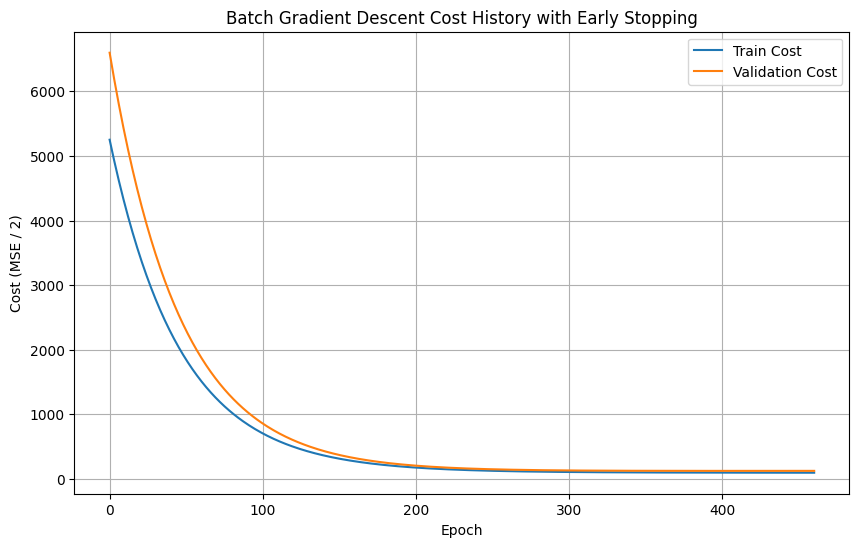


Total epochs run: 461
Maximum epochs allowed: 2000


In [ ]:
#@title Batch Gradient Descent with Early Stopping

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import copy # To copy weights

# 1. Generate Synthetic Data
X, y = make_regression(n_samples=300, n_features=5, n_informative=3, noise=15, random_state=42)

# Reshape y to be a column vector
y = y.reshape(-1, 1)

# 2. Split Data into Training, Validation, and Testing Sets
# First split: Training + Validation vs Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Training vs Validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 of 0.8 is 0.2

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Add a bias term (a column of ones) to the feature matrices
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_val_b = np.c_[np.ones((X_val_scaled.shape[0], 1)), X_val_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

print(f"Training data shape with bias: {X_train_b.shape}")
print(f"Validation data shape with bias: {X_val_b.shape}")
print(f"Testing data shape with bias: {X_test_b.shape}")


# 3. Implement Batch Gradient Descent with Early Stopping

def batch_gradient_descent_with_early_stopping(X_train, y_train, X_val, y_val, learning_rate, n_epochs, patience, min_delta=0):
    """
    Performs Batch Gradient Descent with Early Stopping for linear regression.

    Args:
        X_train (np.ndarray): Training feature matrix with bias column.
        y_train (np.ndarray): Training target variable.
        X_val (np.ndarray): Validation feature matrix with bias column.
        y_val (np.ndarray): Validation target variable.
        learning_rate (float): The step size for gradient updates.
        n_epochs (int): The maximum number of iterations.
        patience (int): Number of epochs to wait for improvement before stopping.
        min_delta (float): Minimum change in validation cost to be considered an improvement.

    Returns:
        tuple: Learned weights (including bias), training cost history, validation cost history.
    """
    n_samples_train, n_features = X_train.shape

    # Initialize weights (including bias)
    weights = np.zeros((n_features, 1))

    train_cost_history = []
    val_cost_history = []
    best_validation_cost = float('inf')
    best_weights = None
    epochs_without_improvement = 0

    print("Starting Batch Gradient Descent with Early Stopping...")
    for epoch in range(n_epochs):
        # Calculate predictions for training data
        train_predictions = X_train @ weights
        train_errors = train_predictions - y_train
        train_cost = np.mean(train_errors**2) / 2
        train_cost_history.append(train_cost)

        # Calculate predictions and cost for validation data
        val_predictions = X_val @ weights
        val_errors = val_predictions - y_val
        val_cost = np.mean(val_errors**2) / 2
        val_cost_history.append(val_cost)

        # Calculate gradients on the training data
        gradients = (1/n_samples_train) * X_train.T @ train_errors

        # Update weights
        weights = weights - learning_rate * gradients

        # Early Stopping Logic
        if val_cost < best_validation_cost - min_delta:
            best_validation_cost = val_cost
            best_weights = copy.deepcopy(weights) # Save the best weights
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered at epoch {epoch} (no improvement for {patience} epochs).")
            break

        # Optional: Print cost every few epochs
        # if epoch % (n_epochs // 10) == 0:
        #     print(f"Epoch {epoch}: Train Cost = {train_cost:.4f}, Val Cost = {val_cost:.4f}")

    if best_weights is None: # In case patience is 0 or training stops immediately
        best_weights = weights

    print("Batch Gradient Descent with Early Stopping complete.")
    return best_weights, train_cost_history, val_cost_history

# 4. Set Hyperparameters for Batch Gradient Descent with Early Stopping
learning_rate = 0.01
n_epochs = 2000 # Set a high max epoch, as early stopping will stop it
patience = 50 # Number of epochs to wait for validation loss to improve
min_delta = 0.0001 # Minimum change in validation loss to be considered an improvement

# Run Batch Gradient Descent with Early Stopping
learned_weights_es, train_cost_history_es, val_cost_history_es = batch_gradient_descent_with_early_stopping(
    X_train_b, y_train, X_val_b, y_val, learning_rate, n_epochs, patience, min_delta
)

# Extract bias and feature coefficients
learned_bias_es = learned_weights_es[0][0]
learned_coefficients_es = learned_weights_es[1:]

print(f"\nLearned Bias (β₀) (Early Stopping): {learned_bias_es:.4f}")
# print(f"Learned Coefficients (β) (Early Stopping): {learned_coefficients_es.T}") # Uncomment to see coefficients


# 5. Evaluate the Trained Model on the Test Set
test_predictions_es = X_test_b @ learned_weights_es
mse_bgd_es = mean_squared_error(y_test, test_predictions_es)
print(f"\nMean Squared Error on Test Data (BGD with Early Stopping): {mse_bgd_es:.4f}")

# 6. Plot the Cost Histories
plt.figure(figsize=(10, 6))
plt.plot(train_cost_history_es, label='Train Cost')
plt.plot(val_cost_history_es, label='Validation Cost')
plt.xlabel('Epoch')
plt.ylabel('Cost (MSE / 2)')
plt.title('Batch Gradient Descent Cost History with Early Stopping')
plt.legend()
plt.grid(True)
plt.show()

# Compare the number of epochs run vs the maximum allowed
print(f"\nTotal epochs run: {len(train_cost_history_es)}")
print(f"Maximum epochs allowed: {n_epochs}")

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)



In [ ]:
oecd_bli = pd.read_csv(oecd_bli_url, thousands=',')

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(5)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [ ]:
gdp_per_capita = pd.read_csv(gdp_per_capita_url, thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(10)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13588.846,2013.0
Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3534.860,2014.0
Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0


In [ ]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [ ]:
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
X = np.linspace(0, 110000, 1000)

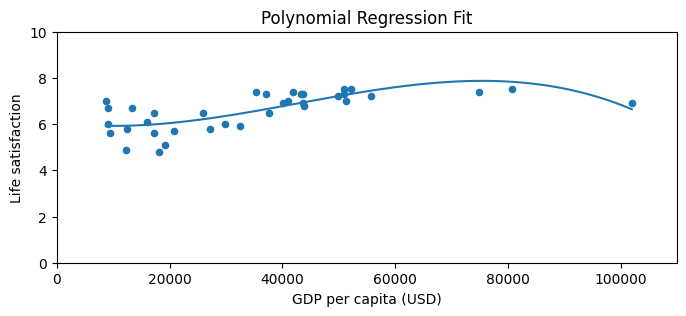

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'full_country_stats' is already loaded and defined
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8, 3))
plt.axis([0, 110000, 0, 10])

# Prepare data
Xfull = full_country_stats[["GDP per capita"]].values
yfull = full_country_stats["Life satisfaction"].values

# Replace NaN with mean
imputer = SimpleImputer(strategy='mean')
Xfull = imputer.fit_transform(Xfull)
yfull = imputer.fit_transform(yfull.reshape(-1, 1)).ravel()

# Define the pipeline:
poly = PolynomialFeatures(degree=3, include_bias=False)  # Reduced degree to 3
scaler = StandardScaler()
lin_reg2 = LinearRegression()

pipeline_reg = Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)
])

pipeline_reg.fit(Xfull, yfull)

# Generate a range of values for GDP per capita to create a smooth curve
X = np.linspace(Xfull.min(), Xfull.max(), 100).reshape(-1, 1)
curve = pipeline_reg.predict(X)

# Plot the results
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title('Polynomial Regression Fit')
plt.show()


# New Section

In [ ]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [ ]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(np.float64(4.853052800266436), np.float64(4.911544589158484e-05))

In [ ]:
lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]

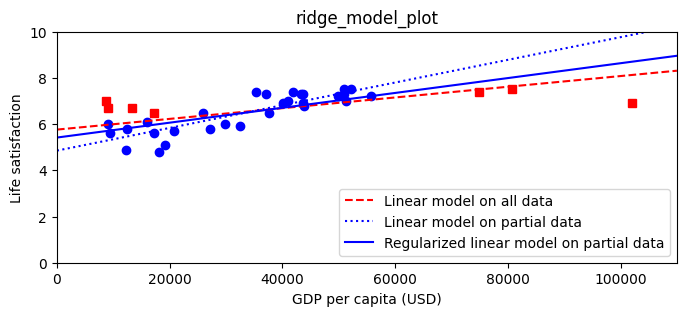

In [ ]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)

# t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
t0ridge, t1ridge = ridge.intercept_, ridge.coef_[0]

plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")
plt.title('ridge_model_plot')
plt.show()

# Further Readings


- [Fuzzy Logic](https://au.mathworks.com/help/fuzzy/what-is-fuzzy-logic.html) (not directly related to the topics in this notebook and hence not covered in the lecture)
 - TODO: Is it cold or hot?
- Sigmoid function / Logistic function
 - [Sigmoid Function](https://en.wikipedia.org/wiki/Sigmoid_function)
 - [Logistic Function](https://en.wikipedia.org/wiki/Logistic_function)
- [Lp Spaces](https://en.wikipedia.org/wiki/Lp_space) (and what are $L_1$ and $L_2$? as in L1 and L2 regularisation)
- [Regularisation](https://en.wikipedia.org/wiki/Regularization_(mathematics)) as in [Machine Learning](https://en.wikipedia.org/wiki/Regularization_(mathematics)#Other_uses_of_regularization_in_statistics_and_machine_learning)
- [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)
- (statmodels)[Linear Regression](https://www.statsmodels.org/stable/regression.html) using [statsmodels](https://www.statsmodels.org/stable/index.html)
- (Scikit-learn) [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html)
- [Model Selection](https://en.wikipedia.org/wiki/Model_selection)
- [Regularised Linear Regression](https://www.kaggle.com/code/vuhunghn/regularized-linear-models)
- [Chess rating linear regression](https://www.chesschat.org/showthread.php?19070-ACF-vs-FIDE-Ratings&p=515600&viewfull=1#post515600)
- [Probability - Statistics Refresher](https://colab.research.google.com/drive/1o5tKMymXnbH4JpvwMIZsVQae0OTOxg7s)
- [NSW Transport open data](https://opendata.transport.nsw.gov.au/)
- [Distance in Machine Learning](https://colab.research.google.com/github/vuhung16au/MachineLearning-GenAI/blob/main/Distances_in_Data_Science_Machine_Learning.ipynb)